If they are: Do the var(Te) [two versions: 1) calculated from error propagation and 2) directly calculated] VS theta ([0, pi]) plots at different radius (i.e. different index slices of that (288, 128, 128) array). Say, radius r=2, then choose the slice varTe[2, 0, :] (following ($r, \phi, \theta$)) so that you got a 1D var(Te) at radius r=2 along theta

In [1]:
import warnings

from matplotlib import pyplot as plt
import numpy as np

In [2]:
# some constants
cl = 29979245800.0 # speed of light in cgs
mp = 1.67262171e-24
kb = 1.3806505e-16
mu = 1.

<h3>MAD</h3>

<h5>Rh=1</h5>

In [3]:
# the var(Te) directly calculated
varTe_file = np.load('ma_rh1_varTe.npy', allow_pickle=True)

In [4]:
# read in coefficients and other variances to calculate var(Te)
# variances
varPg_file = np.load('ma_varPg.npy', allow_pickle=True)
varRHO_file = np.load('ma_varRHO.npy', allow_pickle=True)
varbsq_file = np.load('ma_varbsq.npy', allow_pickle=True)

# averages
ma_avg_Pg = np.load('ma_avgPg.npy', allow_pickle=True).item()['Pg']
ma_avg_RHO = np.load('ma_avgRHO.npy', allow_pickle=True).item()['RHO']
ma_avg_bsq = np.load('ma_avgbsq.npy', allow_pickle=True).item()['bsq']

ma_avgPgRHO = np.load('ma_avgRHOPg.npy', allow_pickle=True).item()['rhoPg']
ma_avgPgbsq = 2*mu*np.load('ma_avgPgPmag.npy', allow_pickle=True).item()['PgPmag']
ma_avgRHObsq = 2*mu*np.load('ma_avgRHOPmag.npy', allow_pickle=True).item()['rhoPmag']

# covariances
ma_covPgRHO = ma_avgPgRHO - ma_avg_Pg * ma_avg_RHO
ma_covPgbsq = ma_avgPgbsq - ma_avg_Pg * ma_avg_bsq
ma_covRHObsq = ma_avgRHObsq - ma_avg_RHO * ma_avg_bsq

In [ ]:
# coefficients
ma_CPg1 = np.load('ma_CPg1.npy')
ma_Crho1 = np.load('ma_Crho1.npy')
ma_Cbsq1 = np.load('ma_Cbsq1.npy')

$a = y(\gamma_{i} - 1)$ <br>
$b = z(\gamma_{e} - 1)$ <br>
$c = \frac{m_{p}(\gamma_{i} - 1)(\gamma_{e}-1)}{k_{B}(\gamma - 1)}$ <br>
$Te = \frac{m_{p}u(\gamma_{e}-1)(\gamma_{i}-1)}{k\rho (y(\gamma_{i}-1)+Rz(\gamma_{e}-1))}=c\frac{P_{g}}{\rho(a+bR)}$<br>
$C[Pg -> Te] = A = \frac{<Te>}{<Pg>}-\frac{2b<Te><Pg>(R_{h} - <R>)}{(<P_{mag}>^{2}+<Pg>^{2})(a+b<R>)}$ <br>
$C[\rho -> Te] = B = -\frac{<Te>}{<\rho>}$ <br>
$C[B^{2} -> Te] = C = \frac{b<Te><Pg>}{2\mu_{0}(<P_{mag}>^{2}+<Pg>^{2})(a+b<R>)}$ <br>
var(Te) = $(\delta Te)^{2}$ = $A^{2}$var(Pg) + $B^{2}$var($\rho$) + $C^{2}$var(bsq) + 2$AB$cov(Pg, $\rho$) + 2$AC$ cov(Pg, bsq) + 2$BC$ cov($\rho$, bsq)

In [5]:
# var(Te) caculated from coefficients and variances
varTe_coeff = np.square(ma_CPg1)*varPg_file + np.square(ma_Crho1)*varRHO_file + np.square(ma_Cbsq1)*varbsq_file + \
            2*ma_CPg1*ma_Crho1*ma_covPgRHO + 2*ma_CPg1*ma_Cbsq1*ma_covPgbsq + 2*ma_Crho1*ma_Cbsq1*ma_covRHObsq

In [6]:
varTe_coeff

array([[[1.09506498e+22, 1.04071005e+22, 9.68247128e+21, ...,
         1.00542402e+22, 9.79153632e+21, 1.12872482e+22],
        [6.81633691e+21, 5.76686535e+21, 4.32626904e+21, ...,
         5.33595670e+21, 6.17495637e+21, 7.13512060e+21],
        [1.97742942e+22, 1.83610228e+22, 1.54701373e+22, ...,
         1.80693660e+22, 2.05921057e+22, 2.05119616e+22],
        ...,
        [2.07756705e+22, 2.57118890e+22, 2.27664073e+22, ...,
         1.80633718e+22, 1.91608215e+22, 1.86673057e+22],
        [4.30817681e+21, 4.16799647e+21, 4.53671502e+21, ...,
         7.84388040e+21, 6.26161453e+21, 4.86405663e+21],
        [1.57144697e+22, 1.28308457e+22, 1.10804949e+22, ...,
         1.97804635e+22, 1.79789077e+22, 1.74630445e+22]],

       [[1.61606088e+22, 1.61694646e+22, 1.41616963e+22, ...,
         1.47306962e+22, 1.40957930e+22, 1.55419077e+22],
        [1.27260073e+22, 9.01667416e+21, 6.51411517e+21, ...,
         9.43152033e+21, 9.18132881e+21, 1.21768779e+22],
        [1.94552082e+22, 

Perform a percent error check?

In [19]:
relative_error = (varTe_coeff - varTe_file)/varTe_file
relative_error

array([[[ 6.00049852e-02,  8.46494479e-02,  7.82600626e-02, ...,
          3.74196654e-02,  2.67638695e-02,  2.26334208e-02],
        [-2.53998035e-02,  1.66754828e-02,  3.99090813e-02, ...,
         -3.57798369e-02, -1.44629292e-02, -2.57056569e-02],
        [ 8.53734143e-03,  1.55850140e-02,  3.34665256e-03, ...,
          7.46947248e-03, -1.54768145e-03, -2.72526552e-03],
        ...,
        [-5.81921370e-02, -3.93122616e-02, -6.08165528e-03, ...,
         -3.08396156e-02, -1.66963313e-02, -3.90186902e-02],
        [-9.22011194e-03,  1.03874524e-02,  2.84130568e-02, ...,
          2.44571299e-03, -9.95808307e-03, -2.00574500e-02],
        [ 4.51371827e-02,  4.06372138e-02,  2.93979224e-02, ...,
          1.78632228e-02,  2.81105096e-02,  3.45365941e-02]],

       [[ 1.10372610e-01,  1.26254145e-01,  1.19835641e-01, ...,
          6.62524179e-02,  6.25021271e-02,  7.05050207e-02],
        [-1.56207798e-02,  2.44701896e-02,  5.85550125e-02, ...,
         -4.98265722e-02, -3.82844682e

Try: r = 2, 5, 8

In [8]:
def comparison_plot(r, varTe_exp, varTe_calc):
    varTe_true = varTe_exp[r, 0, :]
    varTe_coeff = varTe_calc[r, 0, :]

    # x axis: theta
    theta = np.linspace(0, np.pi, 128)

    plt.plot(theta, varTe_true, label='expected (at r=%r)'%r)
    plt.plot(theta, varTe_coeff, label='calculated (at r=%r)'%r)
    plt.xlabel('theta')
    plt.ylabel('var(Te)')
    plt.legend()
    plt.title('Comparison Between Calculated and Expected var(Te)', y=1.1)
    plt.show()

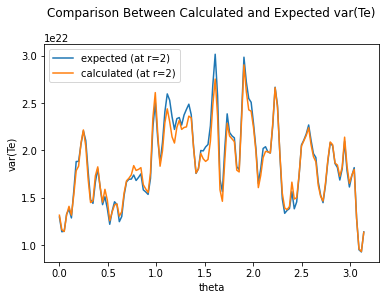

In [33]:
comparison_plot(2, varTe_file, varTe_coeff)

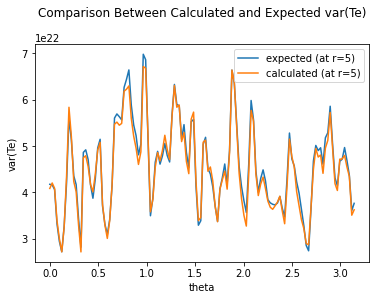

In [34]:
comparison_plot(5, varTe_file, varTe_coeff)

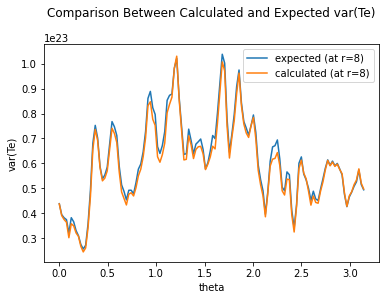

In [35]:
comparison_plot(8, varTe_file, varTe_coeff)

Try: middle and last few slices

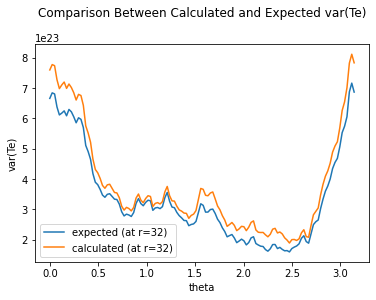

In [36]:
comparison_plot(32, varTe_file, varTe_coeff)

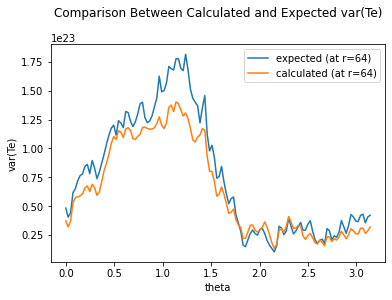

In [37]:
comparison_plot(64, varTe_file, varTe_coeff)

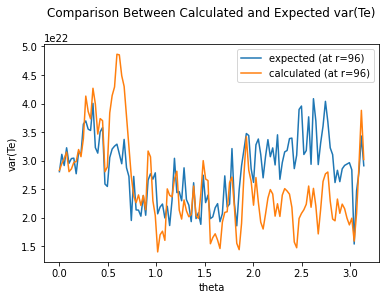

In [38]:
comparison_plot(96, varTe_file, varTe_coeff)

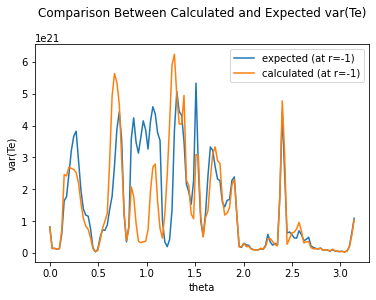

In [39]:
comparison_plot(-1, varTe_file, varTe_coeff)

<h5>Rh=160</h5>

In [40]:
# the var(Te) directly calculated
varTe_rh160 = np.load('ma_rh160_varTe.npy', allow_pickle=True)

In [41]:
# coefficients for MAD Rh=160
ma_CPg160 = np.load('ma_CPg160.npy')
ma_Crho160 = np.load('ma_Crho160.npy')
ma_Cbsq160 = np.load('ma_Cbsq160.npy')

In [42]:
# var(Te) caculated from coefficients and variances
varTe_coeff_rh160 = np.square(ma_CPg160)*varPg_file + np.square(ma_Crho160)*varRHO_file + np.square(ma_Cbsq160)*varbsq_file + \
            2*ma_CPg160*ma_Crho160*ma_covPgRHO + 2*ma_CPg160*ma_Cbsq160*ma_covPgbsq + 2*ma_Crho160*ma_Cbsq160*ma_covRHObsq

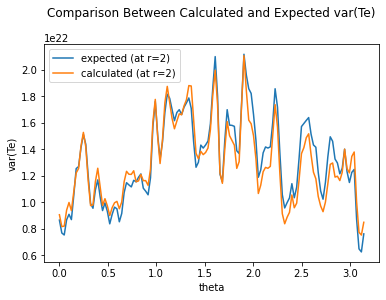

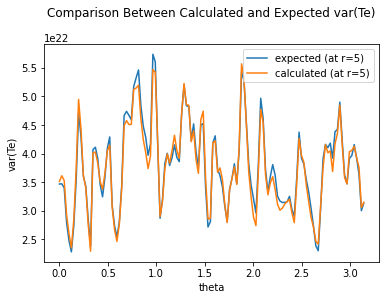

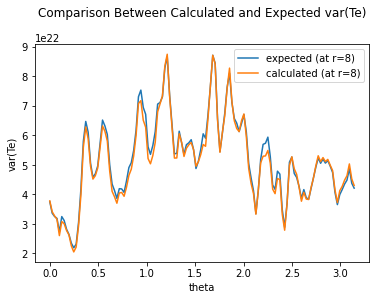

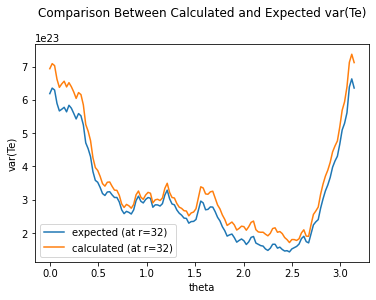

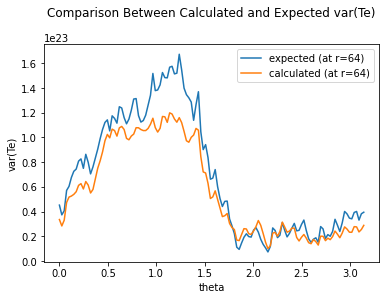

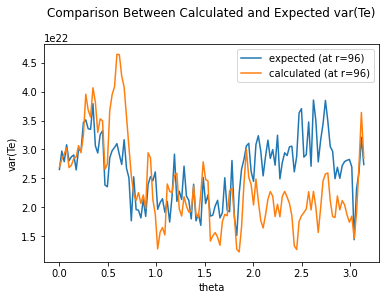

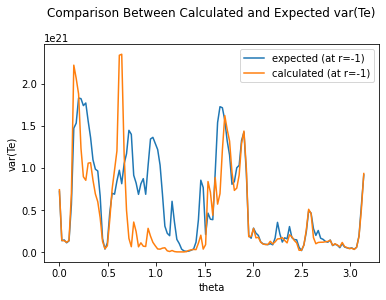

In [43]:
radius_idx = [2, 5, 8, 32, 64, 96, -1]
for r in radius_idx:
    comparison_plot(r, varTe_rh160, varTe_coeff_rh160)

<h3>SANE</h3>

<h5>Rh=1</h5>

In [3]:
# the var(Te) directly calculated
varTe_sa_file = np.load('sa_rh1_varTe.npy', allow_pickle=True)

In [4]:
# read in coefficients and other variances to calculate var(Te)
# variances
varPg_file = np.load('sa_varPg.npy', allow_pickle=True)
varRHO_file = np.load('sa_varRHO.npy', allow_pickle=True)
varbsq_file = np.load('sa_varbsq.npy', allow_pickle=True)

# averages
sa_avg_Pg = np.load('sa_avgPg.npy', allow_pickle=True).item()['Pg']
sa_avg_RHO = np.load('sa_avgRHO.npy', allow_pickle=True).item()['RHO']
sa_avg_bsq = np.load('sa_avgbsq.npy', allow_pickle=True).item()['bsq']

sa_avgPgRHO = np.load('sa_avgRHOPg.npy', allow_pickle=True).item()['rhoPg']
sa_avgPgbsq = 2*mu*np.load('sa_avgPgPmag.npy', allow_pickle=True).item()['PgPmag']
sa_avgRHObsq = 2*mu*np.load('sa_avgRHOPmag.npy', allow_pickle=True).item()['rhoPmag']

# covariances
sa_covPgRHO = sa_avgPgRHO - sa_avg_Pg * sa_avg_RHO
sa_covPgbsq = sa_avgPgbsq - sa_avg_Pg * sa_avg_bsq
sa_covRHObsq = sa_avgRHObsq - sa_avg_RHO * sa_avg_bsq

In [5]:
# coefficients
sa_CPg1 = np.load('sa_CPg1.npy')
sa_Crho1 = np.load('sa_Crho1.npy')
sa_Cbsq1 = np.load('sa_Cbsq1.npy')

In [6]:
# var(Te) caculated from coefficients and variances
varTe_sa_coeff = np.square(sa_CPg1)*varPg_file + np.square(sa_Crho1)*varRHO_file + np.square(sa_Cbsq1)*varbsq_file + \
            2*sa_CPg1*sa_Crho1*sa_covPgRHO + 2*sa_CPg1*sa_Cbsq1*sa_covPgbsq + 2*sa_Crho1*sa_Cbsq1*sa_covRHObsq

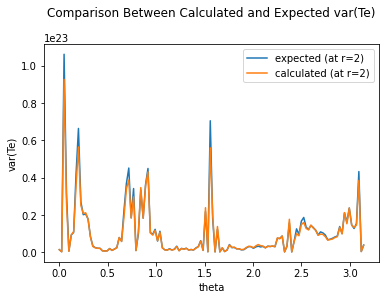

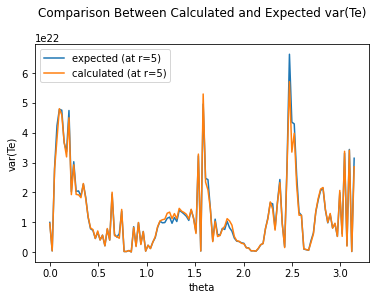

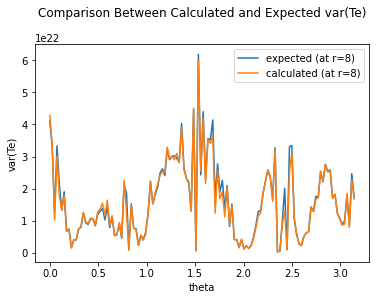

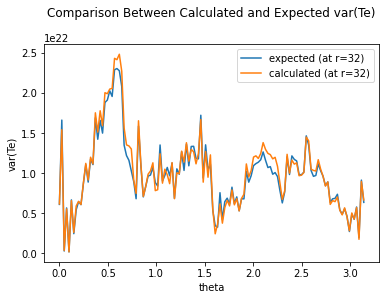

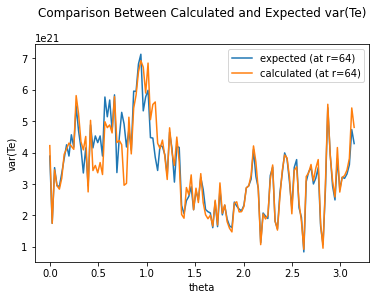

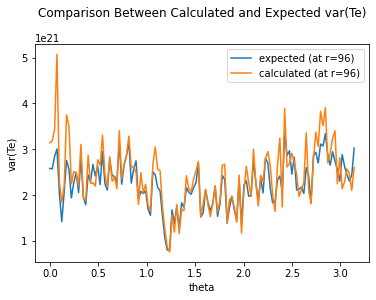

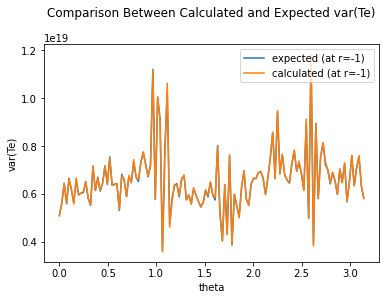

In [9]:
radius_idx = [2, 5, 8, 32, 64, 96, -1]
for r in radius_idx:
    comparison_plot(r, varTe_sa_file, varTe_sa_coeff)

<h5>Rh=160</h5>

In [10]:
# the var(Te) directly calculated
varTe_sa_rh160 = np.load('sa_rh160_varTe.npy', allow_pickle=True)

In [11]:
# coefficients
sa_CPg160 = np.load('sa_CPg160.npy')
sa_Crho160 = np.load('sa_Crho160.npy')
sa_Cbsq160 = np.load('sa_Cbsq160.npy')

In [12]:
# var(Te) caculated from coefficients and variances
varTe_sa_coeff160 = np.square(sa_CPg160)*varPg_file + np.square(sa_Crho160)*varRHO_file + np.square(sa_Cbsq160)*varbsq_file + \
            2*sa_CPg160*sa_Crho160*sa_covPgRHO + 2*sa_CPg160*sa_Cbsq160*sa_covPgbsq + 2*sa_Crho160*sa_Cbsq160*sa_covRHObsq

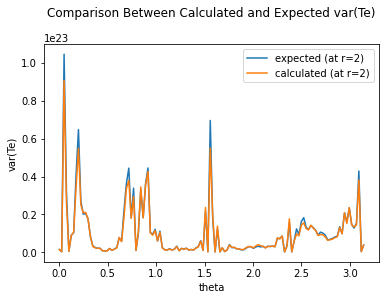

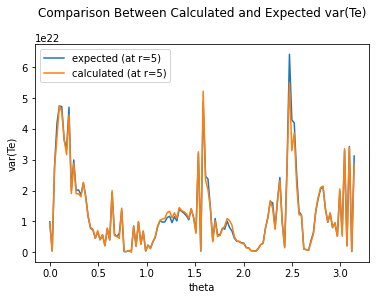

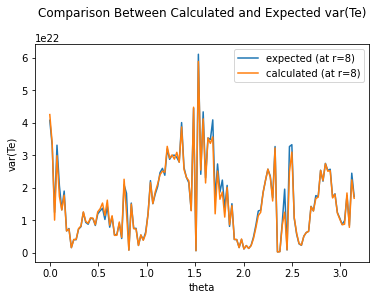

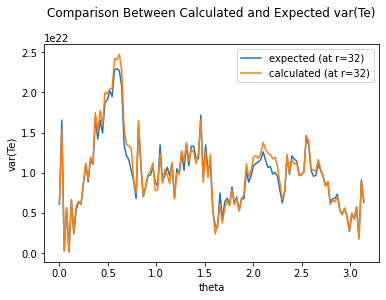

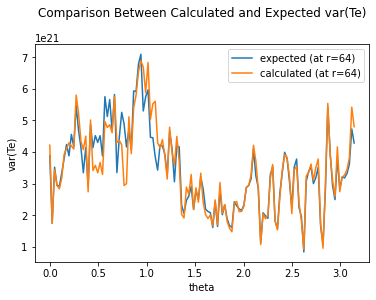

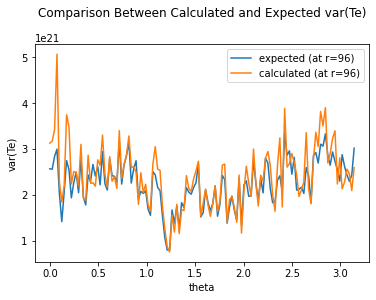

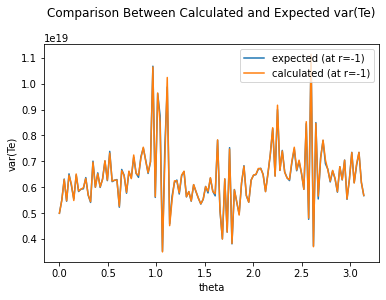

In [13]:
radius_idx = [2, 5, 8, 32, 64, 96, -1]
for r in radius_idx:
    comparison_plot(r, varTe_sa_rh160, varTe_sa_coeff160)